<a href="https://colab.research.google.com/github/Gaurb/Deepfake_Detection_Model/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import opendatasets as od
import os
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt

In [ ]:
ds_url = "https://www.kaggle.com/datasets/mahabuburrahman/celeba"

In [ ]:
od.download(ds_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gaurbh
Your Kaggle Key: ··········


100%|██████████| 1.70G/1.70G [00:21<00:00, 86.2MB/s]


In [ ]:
path = '/content/celeba/dataset'
def plot_image(path, set_):
    new_path = os.path.join(path, 'Train', set_)
    fig, ax = plt.subplots(5,5, figsize=(20,10))
    fig.suptitle(set_ + 'Faces')
    k = 0
    for j in range(0,5,1):
        for i in range(0,5,1):
            img = load_img(os.path.join(new_path, os.listdir(os.path.join(new_path))[k]))
            ax[i,j].imshow(img)
            ax[i,j].set_title("")
            ax[i,j].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

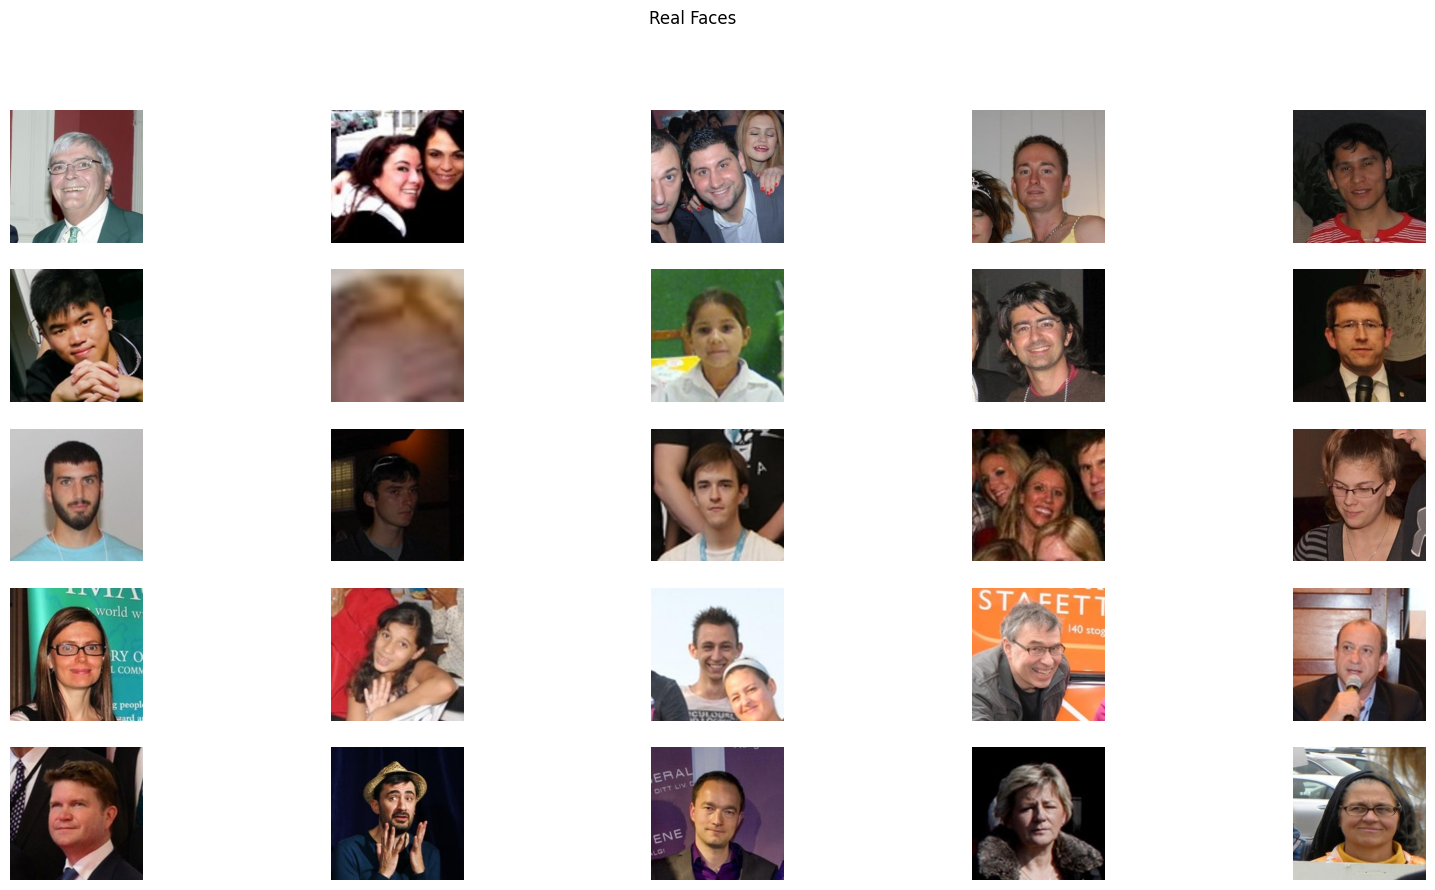

In [ ]:
plot_image(path,'Real')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

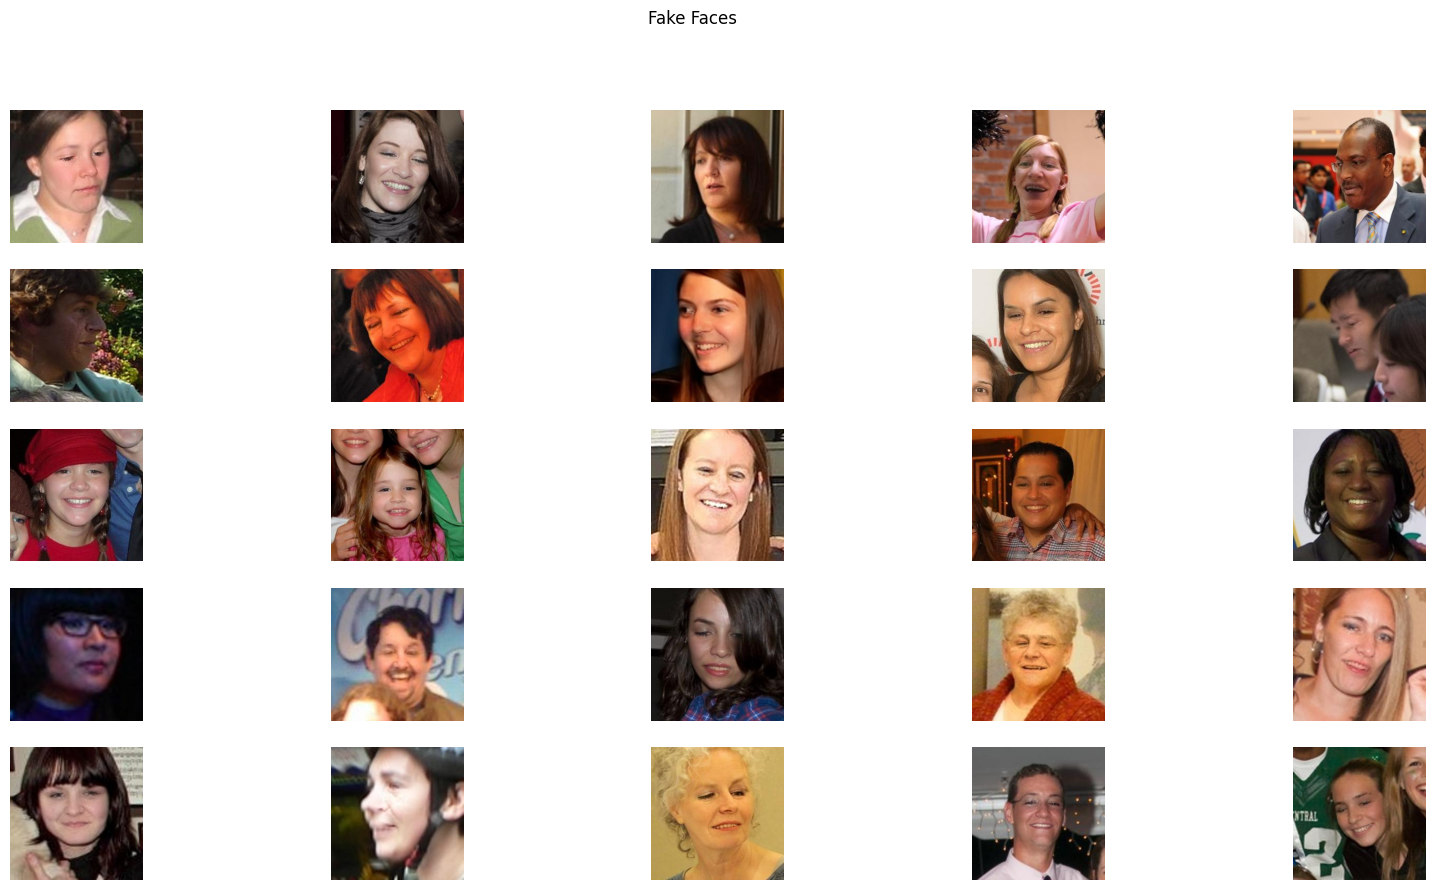

In [ ]:
plot_image(path,'Fake')

In [ ]:
bs = 64
row, col = 128, 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                    rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  )
training_set = train_datagen.flow_from_directory(path + '/Train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/Validation',
                                                      class_mode='binary',
                                                      shuffle=False,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     )
test_set = val_test_datagen.flow_from_directory(path + '/Test',
                                                class_mode='binary',
                                                shuffle=False,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
test_set.class_indices

Found 140002 images belonging to 2 classes.
Found 39428 images belonging to 2 classes.
Found 10905 images belonging to 2 classes.


{'Fake': 0, 'Real': 1}

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [ ]:
base_model = VGG16(include_top = False, weights = 'imagenet', input_shape = (128,128,3), classes = 2)
model= Sequential()
model.add(base_model)
model.add(Flatten())
model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 14714688 (56.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.add(Dense(1024,activation=('relu'),input_dim=2))
model.add(Dense(512,activation=('relu')))
model.add(Dense(256,activation=('relu')))

model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(64,activation=('relu')))
model.add(Dense(32,activation=('relu')))
model.add(Dense(8,activation=('relu')))
#model.add(Dropout(.4))
model.add(Dense(2,activation=('softmax')))

#Checking the final model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1024)              8389632   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 64)                8

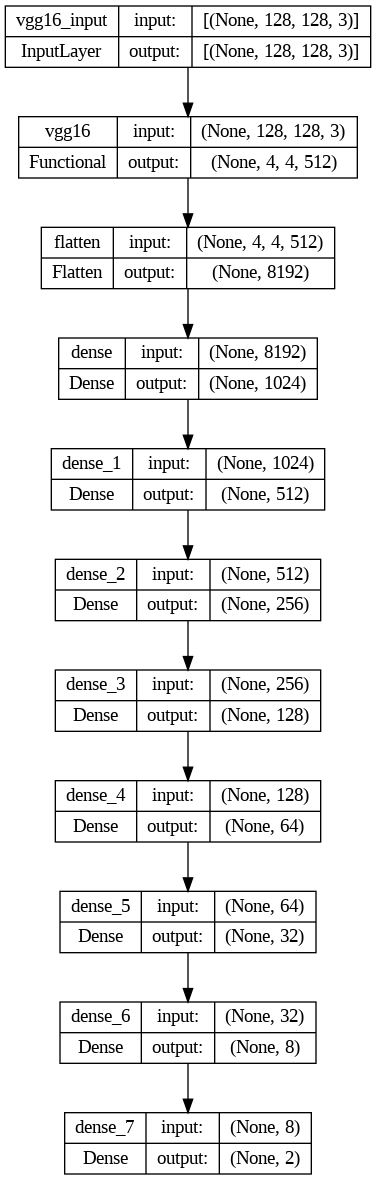

In [ ]:
plot_model(model, to_file='model.png',show_shapes=True)

In [ ]:
batch_size= 64
epochs=15
learn_rate=.001
sgd=SGD(learning_rate=learn_rate,momentum=.9,nesterov=False)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(training_set, batch_size = 64, epochs = 10, validation_data = validation_set, verbose = 1)

Epoch 1/10
2188/2188 [==============================] - 956s 428ms/step - loss: 0.2198 - accuracy: 0.9053 - val_loss: 0.1825 - val_accuracy: 0.9306
Epoch 2/10
2188/2188 [==============================] - 918s 420ms/step - loss: 0.1158 - accuracy: 0.9545 - val_loss: 0.1097 - val_accuracy: 0.9557
Epoch 3/10
2188/2188 [==============================] - 919s 420ms/step - loss: 0.0932 - accuracy: 0.9644 - val_loss: 0.1035 - val_accuracy: 0.9599
Epoch 4/10
2188/2188 [==============================] - 917s 419ms/step - loss: 0.0818 - accuracy: 0.9683 - val_loss: 0.0944 - val_accuracy: 0.9661
Epoch 5/10
2188/2188 [==============================] - 914s 418ms/step - loss: 0.0746 - accuracy: 0.9714 - val_loss: 0.0864 - val_accuracy: 0.9673
Epoch 6/10
2188/2188 [==============================] - 920s 420ms/step - loss: 0.0678 - accuracy: 0.9739 - val_loss: 0.0885 - val_accuracy: 0.9659
Epoch 7/10
2188/2188 [==============================] - 915s 418ms/step - loss: 0.0631 - accuracy: 0.9759 - val_

In [ ]:
history = model.fit(training_set, batch_size = 64, epochs = 10, validation_data = validation_set, verbose = 1)

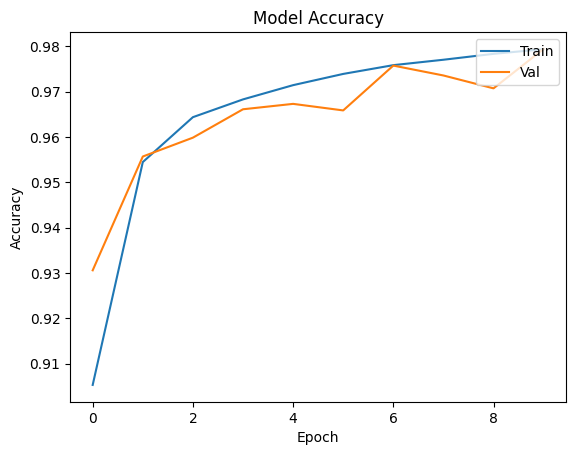

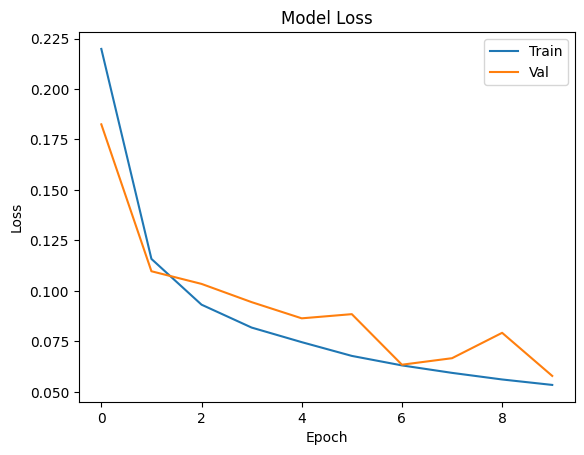

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Trained/Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss, test_acc = model.evaluate(test_set)

171/171 [==============================] - 17s 97ms/step - loss: 0.3479 - accuracy: 0.9126


In [ ]:
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve,confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd
from tensorflow.keras.utils import img_to_array
import os
from keras.preprocessing.image import load_img

In [ ]:
model_new = load_model('/content/drive/MyDrive/Trained/Vgg16.h5')

In [ ]:
model_new2=load_model('/content/drive/MyDrive/Trained/Model.h5')

In [ ]:
model_new3=load_model('/content/drive/MyDrive/Trained/Mesonet.h5')

In [ ]:
loss, accu = model_new.evaluate(test_set)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

171/171 [==============================] - 15s 83ms/step - loss: 0.5115 - accuracy: 0.7355
Final Test Acccuracy = 73.553


In [ ]:
loss, accu = model_new2.evaluate(test_set)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

171/171 [==============================] - 15s 85ms/step - loss: 0.3479 - accuracy: 0.9126
Final Test Acccuracy = 91.261


In [ ]:
loss, accu = model_new3.evaluate(test_set)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

171/171 [==============================] - 12s 64ms/step - loss: 0.1172 - accuracy: 0.8480
Final Test Acccuracy = 84.796


In [ ]:
y_true = np.concatenate([test_set[i][1] for i in range(len(test_set))])

In [ ]:
y_probabilities = model_new.predict(test_set)
p=y_probabilities[:, 1]

171/171 [==============================] - 15s 87ms/step


In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true, p)
print("AUC:", auc)

AUC: 0.8243486755805834


In [ ]:
y_probabilities2 = model_new2.predict(test_set)
p2=y_probabilities2[:, 1]

171/171 [==============================] - 15s 87ms/step


In [ ]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_true, p2)
print("AUC:", auc)

AUC: 0.9681433747274808


In [ ]:
y_probabilities3 = model_new3.predict(test_set)

171/171 [==============================] - 11s 63ms/step


In [ ]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_probabilities3)
print("AUC:", auc)

AUC: 0.9354254963873354


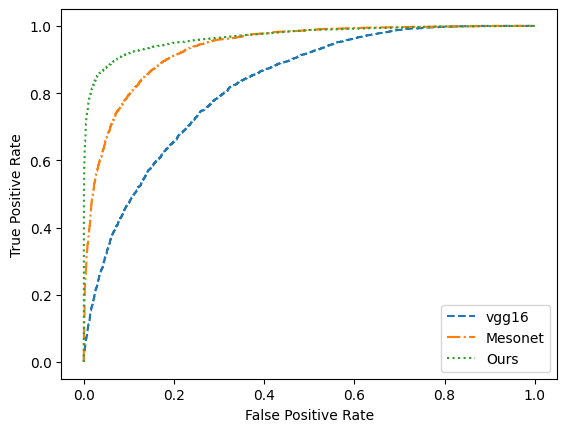

In [ ]:
fpr, tpr, _ = roc_curve(y_true, p)
fpr, tpr, threshold = roc_curve(y_true, p)
fpr1,tpr1,threshold1=roc_curve(y_true,p2)
fpr2,tpr2,threshold2=roc_curve(y_true,y_probabilities3)
plt.plot(fpr, tpr, linestyle='--', label="vgg16")
plt.plot(fpr2, tpr2, linestyle='dashdot', label="Mesonet")
plt.plot(fpr1, tpr1, linestyle='dotted', label="Ours")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()